In [17]:
from matplotlib import pyplot as plt
import numpy as np
import random
from random import seed

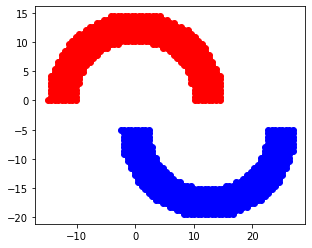

In [18]:
thk = 5
sep = 5
rad = 10

xs_red = []
ys_red = []

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_aspect('equal')

for x_coord in np.arange(-(rad+thk),rad+thk,0.6):
    for y_coord in np.arange(0 ,rad+thk,0.6):
        if rad**2 <= (x_coord - 0)**2 + (y_coord - 0)**2 <= (rad+thk)**2:
            xs_red.append(x_coord)
            ys_red.append(y_coord)


xs_blue = []
ys_blue = []

for x_coord in np.arange(-(thk/2),(thk/2 + (2*rad) + thk),0.6):
    for y_coord in np.arange(-sep ,-(rad++sep+thk),-0.6):
        if rad**2 <= (x_coord - ((thk/2) + rad))**2 + (y_coord - (-sep))**2 <= (rad+thk)**2:
            xs_blue.append(x_coord)
            ys_blue.append(y_coord)


plt.scatter(xs_red, ys_red,color = 'red')
plt.scatter(xs_blue, ys_blue,color = 'blue')
plt.show()

In [20]:
"""
A function for prediction of Y
"""
def Y_predict(x_vector,w):
    x_new = [1]
    for i in x_vector:
        x_new.append(i)
    x_new = np.array((x_new))
    res = (np.dot(x_new,w))
    if res > 0:
        Y = 1
        return Y
    elif res < 0:
        Y = -1
        return Y
    elif res ==0:
        Y = 0
        return Y

"""
The main training function for the data, with the 
Attributes
----------

X - The data set
iterations - the number of times the weights are iterated
eta - the learning rate
"""
def train(X,iterations,eta):
    global count
    global w
    global all_combined_targets
    for y_idx in range (len(X)):
        ran_num = random.randint(0,len(X)-1)
        x_train = X[ran_num]
        y_t = Y_predict(x_train,w)
        misrepresented_list = []
        for i,j in enumerate(all_combined_targets):
            if j!=y_t:
                misrepresented_list.append(i)
        if len(misrepresented_list)==0:
            print('Full accuracy achieved')
            break
        random_selection = random.randint(0,len(misrepresented_list)-1)
        random_index = misrepresented_list[random_selection]
        x_selected = X[random_index]
        y_selected = all_combined_targets[random_index]
        x_with1 = [1]
        for i in x_selected:
            x_with1.append(i)
        x_with1 = np.array((x_with1))
        s_t = np.matmul(w,x_with1)
        if (y_selected*s_t)<=1:
            w = w+(eta*(y_selected-s_t)*x_with1)
        if (count==iterations):
            print('maximum iterations reached in the training block')
            break
            count+=1

In [21]:
xs_red = np.array(xs_red)
ys_red = np.array(ys_red)
xs_blue = np.array(xs_blue)
ys_blue = np.array(ys_blue)
points_1 = []
res1 = []
for i in range(len(xs_red)):
    points_1.append([xs_red[i],ys_red[i]])
    res1.append(-1)
points_1 = np.array(points_1)

points_2 = []
res2 = []
for i in range(len(xs_blue)):
    points_2.append([xs_blue[i],ys_blue[i]])
    res2.append(1)
points_2 = np.array(points_2)
all_input = np.concatenate((points_1, points_2)) #creating a combined dataset
all_d = np.concatenate((res2,res1))

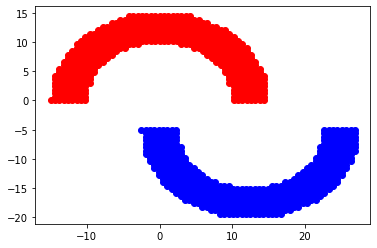

In [22]:
#Visualizing the linearly separable dataset
plt.scatter(xs_red, ys_red, color='red')
plt.scatter(xs_blue,ys_blue, color='blue')
length_dataset = len(xs_red)
d1 = -1 * (np.ones(int(length_dataset/2)))
d2 = np.ones(int(length_dataset/2))
all_combined_targets = np.concatenate((d2,d1))